# Advertising Sales Channel Prediction

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored .

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The company has to select proper sales channel to predict the right sales channel to generate good revenue. 

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('advertising.csv')
df

,Id,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.shape  #checking the data dimension

(200, 5)

In [4]:
df.dtypes  #checking the datatypes of each column

Id             int64
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [5]:
df.info()  #checking the information regarding the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         200 non-null    int64  
 1   TV         200 non-null    float64
 2   radio      200 non-null    float64
 3   newspaper  200 non-null    float64
 4   sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.columns

Index(['Id', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

Visualization of the data

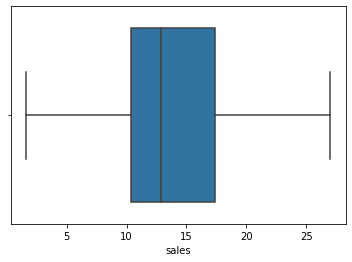

In [7]:
sns.boxplot(df['sales'])
plt.show()


As we can see most of the sales are between 10 to 18.

>Let's see how Sales are related with other variables using scatter plot.


<AxesSubplot:xlabel='TV', ylabel='sales'>

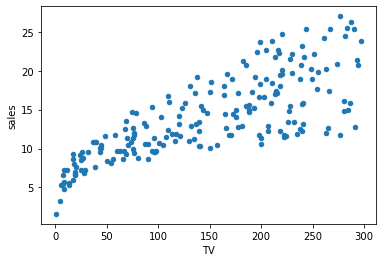

In [8]:
df.plot.scatter(x='TV',y='sales')

<AxesSubplot:xlabel='radio', ylabel='sales'>

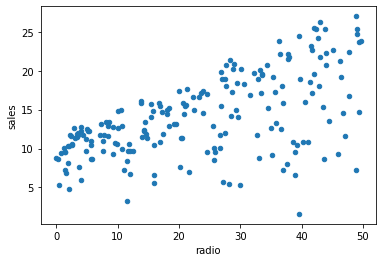

In [9]:
df.plot.scatter(x='radio',y='sales')

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

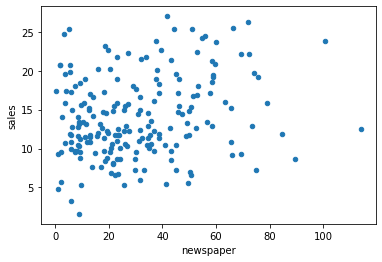

In [10]:
df.plot.scatter(x='newspaper',y='sales')

<AxesSubplot:xlabel='TV'>

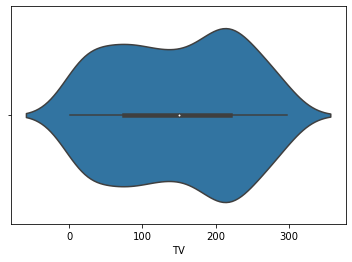

In [11]:
sns.violinplot(x ="TV", data=df)

<AxesSubplot:xlabel='newspaper'>

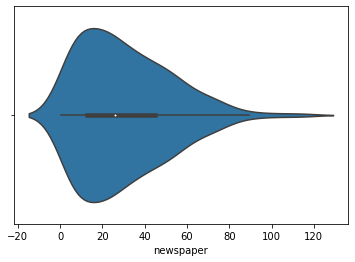

In [12]:
sns.violinplot(x ="newspaper", data=df)

<AxesSubplot:xlabel='radio'>

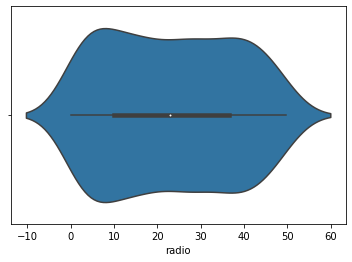

In [13]:
sns.violinplot(x ="radio", data=df)

<AxesSubplot:xlabel='sales'>

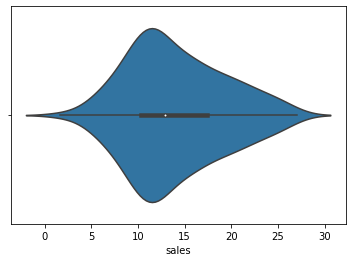

In [14]:
sns.violinplot(x ="sales", data=df)

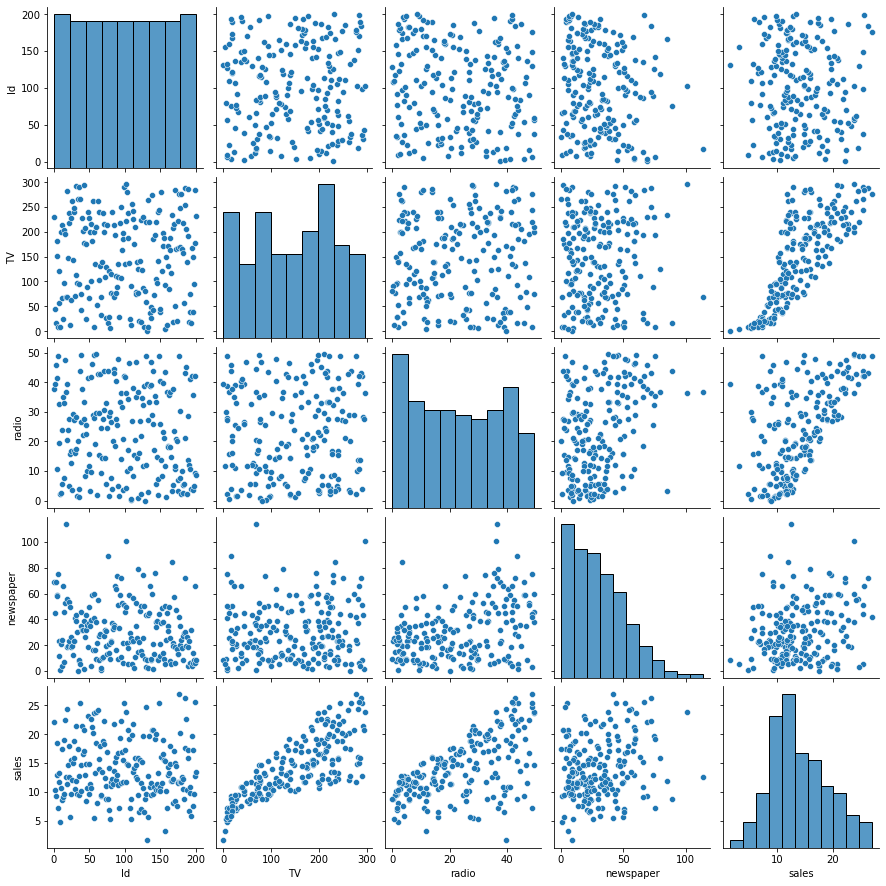

In [15]:
sns.pairplot(df)

In [16]:
#checking the null values in the dataset
df.isnull().sum()

Id           0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

>As we can see that their is no null values present in the dataset.

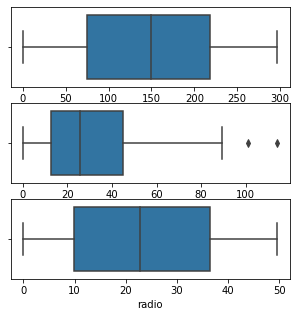

In [17]:
#Checking the Outlier in the colummns

fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['radio'], ax = axs[2])
plt.show()

>As we can see there are no considerable outliers present in the dataset.

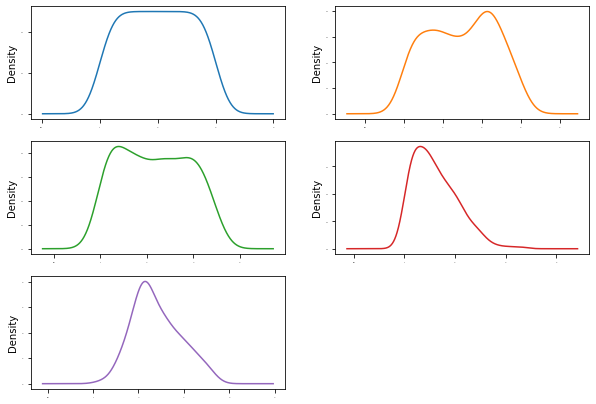

In [18]:
df.plot(kind='density',subplots=True,  layout=(5,2), sharex=False, legend=False, fontsize=1, figsize=(10,12))
plt.show()

In [19]:
#checking the skewness of the dataset
df.skew()

Id           0.000000
TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [20]:
#removing the skewness from the newspaper column
df["newspaper"]=np.cbrt(df["newspaper"])

In [21]:
df.skew()

Id           0.000000
TV          -0.069853
radio        0.094175
newspaper   -0.265522
sales        0.407571
dtype: float64

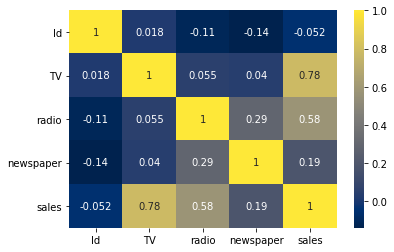

In [22]:
# Let's see the correlation between different columns.
sns.heatmap(df.corr(), cmap="cividis", annot = True)
plt.show()

>As we can see through this correlation that all the data are highly positive correlated to the target variable i.e.'Sales'.

>The most correlated column to the 'Sales' is 'TV'.

>The least correlated column to the 'Sales' is 'newspaper'.

>As it is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So we can select TV as best sales channel and perform regression using TV as our feature variable.

In [23]:
x=df['TV']
y=df['sales']

In [24]:
x=pd.DataFrame(x, columns=['TV'])

In [25]:
x

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [26]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [27]:
#checking the best random state
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is:- 0.5884742462828709
At random state 0, the testing accuracy is:- 0.6763151577939721


At random state 1, the training accuracy is:- 0.6393874827744095
At random state 1, the testing accuracy is:- 0.41535307148347844


At random state 2, the training accuracy is:- 0.6908879285121509
At random state 2, the testing accuracy is:- 0.042179776427879956


At random state 3, the training accuracy is:- 0.6265001617952246
At random state 3, the testing accuracy is:- 0.544378983142958


At random state 4, the training accuracy is:- 0.6361512557215445
At random state 4, the testing accuracy is:- 0.4613874633681754


At random state 5, the training accuracy is:- 0.6354993292037939
At random state 5, the testing accuracy is:- 0.4990784791512455


At random state 6, the training accuracy is:- 0.614394116784656
At random state 6, the testing accuracy is:- 0.5961032800721753


At random state 7, the training accuracy is:- 0.5906529906156639
At random state 7

At random state 71, the testing accuracy is:- 0.5875187271879208


At random state 72, the training accuracy is:- 0.6066063912463135
At random state 72, the testing accuracy is:- 0.6279334893504953


At random state 73, the training accuracy is:- 0.6600024080665019
At random state 73, the testing accuracy is:- 0.3577104087645424


At random state 74, the training accuracy is:- 0.582830721040742
At random state 74, the testing accuracy is:- 0.6418583049747247


At random state 75, the training accuracy is:- 0.60170801060124
At random state 75, the testing accuracy is:- 0.6504229100912061


At random state 76, the training accuracy is:- 0.6374180784897661
At random state 76, the testing accuracy is:- 0.219786329575564


At random state 77, the training accuracy is:- 0.6035206684483596
At random state 77, the testing accuracy is:- 0.6333904409448635


At random state 78, the training accuracy is:- 0.6106441642535638
At random state 78, the testing accuracy is:- 0.6156707096366856


At ran

>From the above stats, at random state 83 the testing accuracy and training accuracy is hightest.

>Testing the best Random State in different algorithms

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=83)

In [29]:
model=[LinearRegression(),SVR(),RandomForestRegressor(),DecisionTreeRegressor()]

In [30]:
for n in model:
    n.fit(x_train,y_train)
    n.score(x_train,y_train)
    predm=n.predict(x_test)
    print('r2 score of',n,'is:')
    print(r2_score(y_test,predm))
    print(mean_squared_error(y_test,predm))
    print(mean_absolute_error(y_test,predm))
    print('\n')

r2 score of LinearRegression() is:
0.7581726425326147
7.602084809344724
2.0786254499771024


r2 score of SVR() is:
0.6626648340866338
10.60446827565258
2.533161061747359


r2 score of RandomForestRegressor() is:
0.6579870205814985
10.751520021000013
2.584305000000002


r2 score of DecisionTreeRegressor() is:
0.5864057131950631
13.001749999999998
2.9724999999999997




>Now checking cross validation score to check whether our models are overfitted or underfitted.

In [31]:
scrli=cross_val_score(LinearRegression(),x,y, cv=5)
print('cross validation score of linearregression: ',scrli.mean())

cross validation score of linearregression:  0.5926000843648256


In [32]:
scrrf=cross_val_score(RandomForestRegressor(),x,y, cv=5)
print('cross validation score of RandomForestregression: ',scrrf.mean())

cross validation score of RandomForestregression:  0.42175036130738597


In [33]:
scrdtr=cross_val_score(DecisionTreeRegressor(),x,y, cv=5)
print('cross validation score of DecisionTreeregression: ',scrdtr.mean())

cross validation score of DecisionTreeregression:  0.24303399871126602


In [34]:
scrsvr=cross_val_score(SVR(),x,y, cv=5)
print('cross validation score of SVR: ',scrsvr.mean())

cross validation score of SVR:  0.5574825437004906


>Minimum difference in r2_score and cross validation score is for  SVR (10). So it is our best model

>Doing GridSearchCV for getting best parameters

In [35]:
#creating parameter list to pass in GridSearchCV
parameters= {'kernel': ['linear','rbf','poly'],
             'epsilon': [0.1,0.01,0.001],
             'max_iter': np.arange(-5,5)}

In [36]:
GCV=GridSearchCV(SVR(),parameters,cv=5)

In [37]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'epsilon': [0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly'],
                         'max_iter': array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4])})

In [38]:
#getting the best parameters found by GridSearchCV
GCV.best_params_

{'epsilon': 0.001, 'kernel': 'linear', 'max_iter': -1}

In [39]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [40]:
r2_score(GCV_pred,y_test)

0.6027780169098949

In [41]:
joblib.dump(GCV.best_estimator_,'advertising.obj')

['advertising.obj']